# Computational physics - Problem Set 1

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import typing
import scienceplots

plt.style.use(['science', 'notebook'])
plt.rcParams["figure.figsize"] = (12, 8)

In [77]:
def estimate_pi(num_samples: float, num_experiments: float) -> typing.Tuple[typing.List[float], typing.List[float], typing.List[float], typing.List[float]]:
  points = np.random.uniform(low=-1.0, high=1.0, size=(2, num_samples, num_experiments))
  radius = (points**2).sum(axis=0)
  inside_circle = radius[(radius <= 1)]

  pi_mean = 4 * (radius <= 1).sum(axis=0) / num_samples
  pi_std = np.sqrt((np.sum((4 * (radius <= 1) - pi_mean)**2, axis=0)) / num_samples)

  return [pi_mean, pi_std, radius, inside_circle]

Estimate PI Mean=3.141. Standard Deviation=1.642


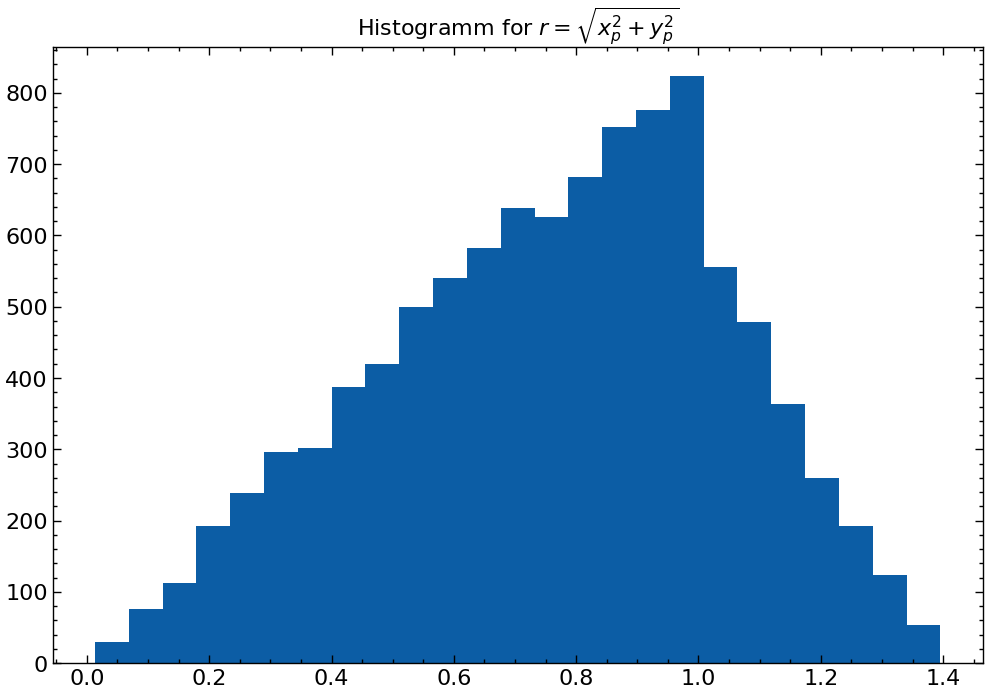

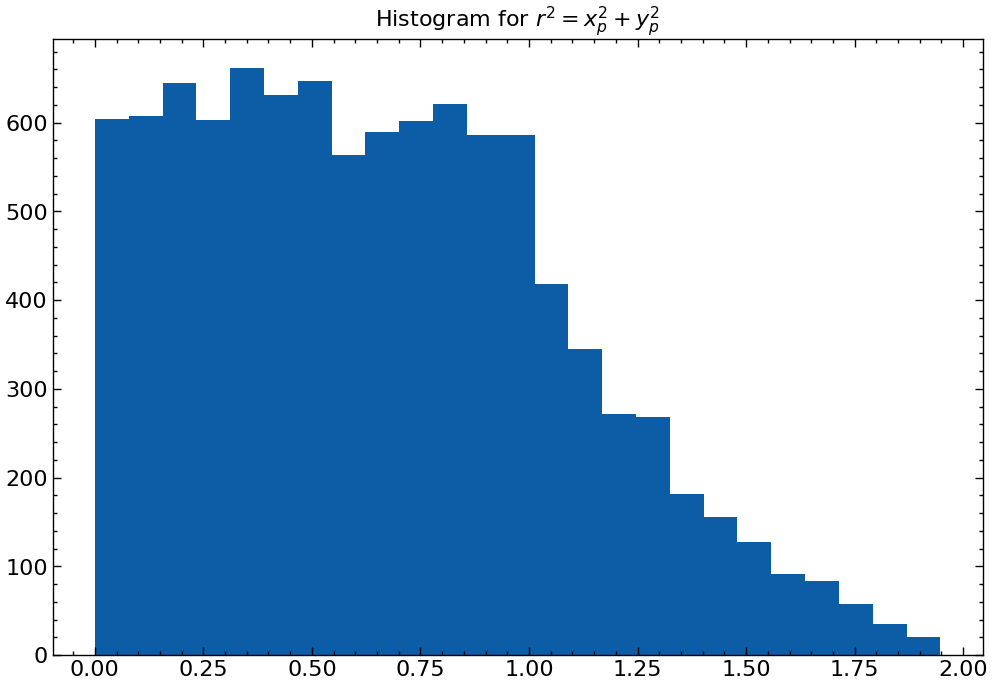

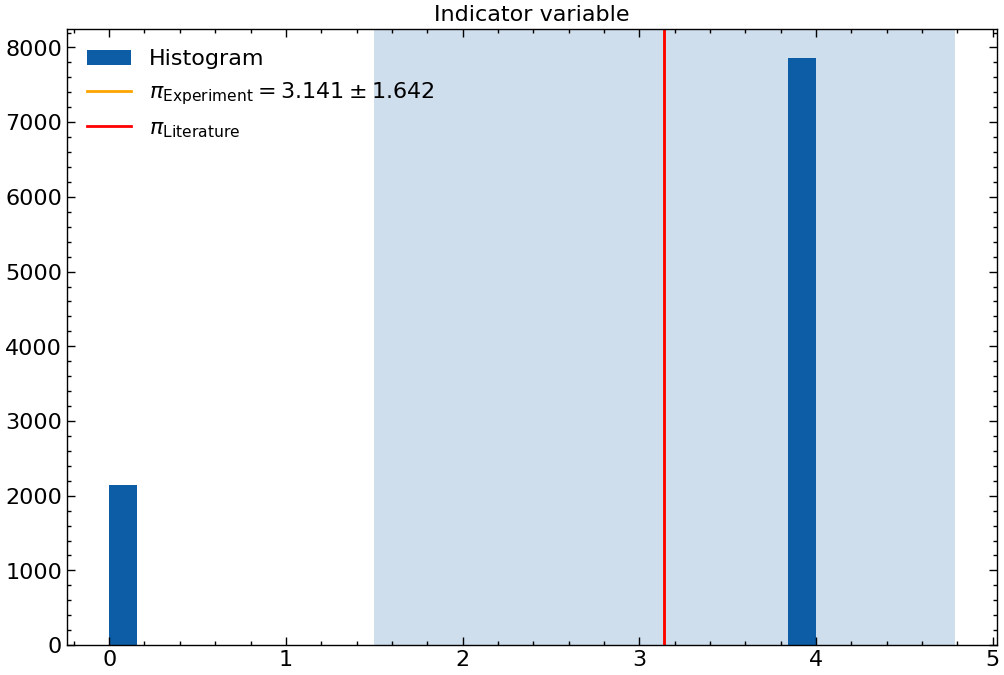

In [78]:
pi_mean, pi_std, radius, inside = estimate_pi(10000, 1)
print(f'Estimate PI Mean={pi_mean[0]:.3f}. Standard Deviation={pi_std[0]:.3f}')

plt.hist(np.sqrt(radius), bins=25)
plt.title('Histogramm for $r = \\sqrt{x_p^2 + y_p^2}$')
plt.show()

plt.hist(radius, bins=25)
plt.title('Histogram for $r^2 = x_p^2 + y_p^2$')
plt.show()



mean = (4 * (radius <= 1)).mean()
std = (4 * (radius <= 1)).std()

plt.hist(4 * (radius <= 1), bins=25, label='Histogram')
plt.axvline(x=mean, color='orange', label=f'$\\pi_\\text{{Experiment}} = {mean:.3f} \\pm {std:.3f}$')
plt.axvline(x=np.pi, color='red', label='$\\pi_\\text{Literature}$')
plt.axvspan(xmin=mean - std, xmax=mean + std, alpha=0.2)

plt.title('Indicator variable')
plt.legend()

plt.show()

## 1.2

Estimate PI Mean=3.118. Standard Deviation=0.165


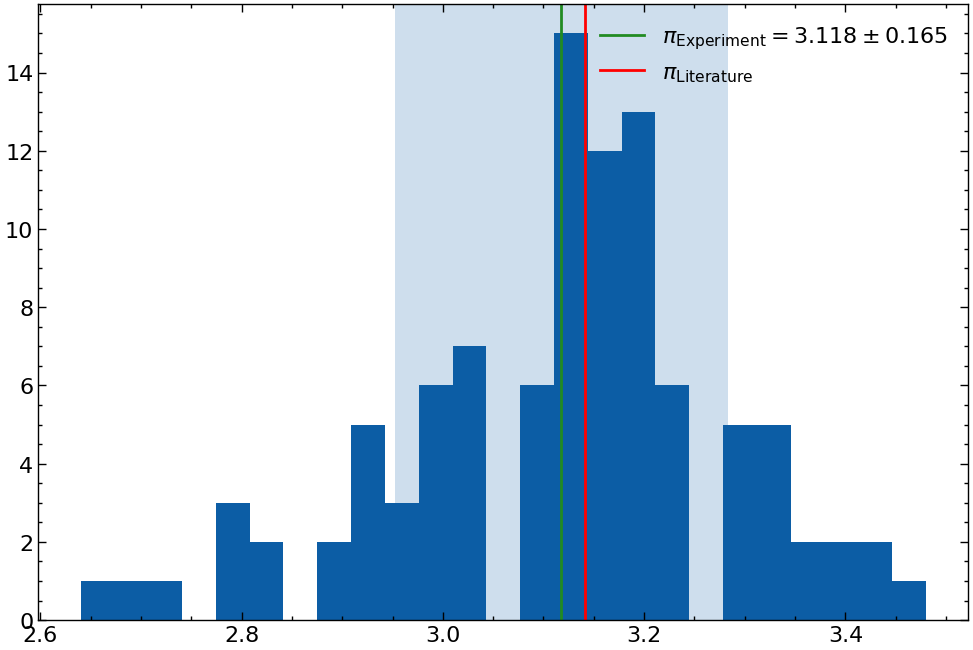

In [93]:
pi_means, pi_stds, radius, inside = estimate_pi(100, 100)

mean = pi_means.sum() / 100
std = np.sqrt(np.sum((pi_means - mean)**2) / 99)
print(f'Estimate PI Mean={mean:.3f}. Standard Deviation={std:.3f}')

plt.hist(pi_means, bins=25)
plt.axvline(x=mean, color='forestgreen', label=f'$\\pi_\\text{{Experiment}} = {mean:.3f} \\pm {std:.3f}$')
plt.axvline(x=np.pi, color='red', label='$\\pi_\\text{Literature}$')
plt.axvspan(xmin=mean - std, xmax=mean + std, alpha=0.2)

plt.legend()
plt.show()

Estimate PI Mean=3.156. Standard Deviation=0.516


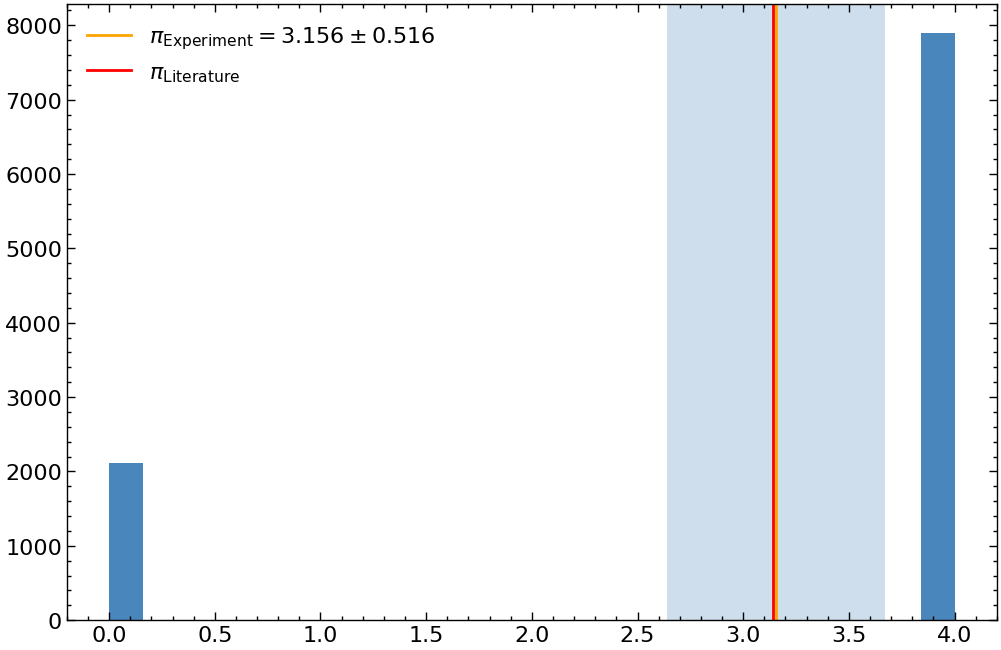

In [90]:
pi_means, pi_stds, radius, inside = estimate_pi(1, 10000)

mean = pi_means.sum() / 10000
std = np.sqrt(np.sum((pi_means - mean)**2) / 99999)
print(f'Estimate PI Mean={mean:.3f}. Standard Deviation={std:.3f}')

plt.hist(pi_means, bins=25)
plt.axvline(x=mean, color='forestgreen', label=f'$\\pi_\\text{{Experiment}} = {mean:.3f} \\pm {std:.3f}$')
plt.axvline(x=np.pi, color='red', label='$\\pi_\\text{Literature}$')
plt.axvspan(xmin=mean - std, xmax=mean + std, alpha=0.2)

plt.legend()
plt.show()

P=10, X=10: Estimate PI Mean=3.4000. Standard Deviation=0.5416


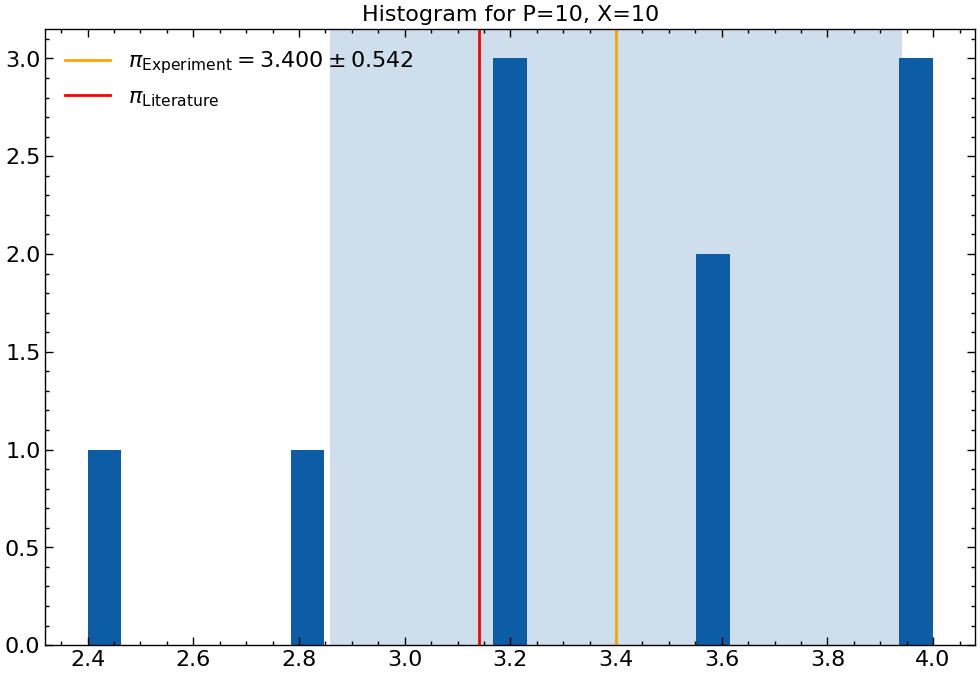

P=10, X=100: Estimate PI Mean=3.2280. Standard Deviation=0.4997


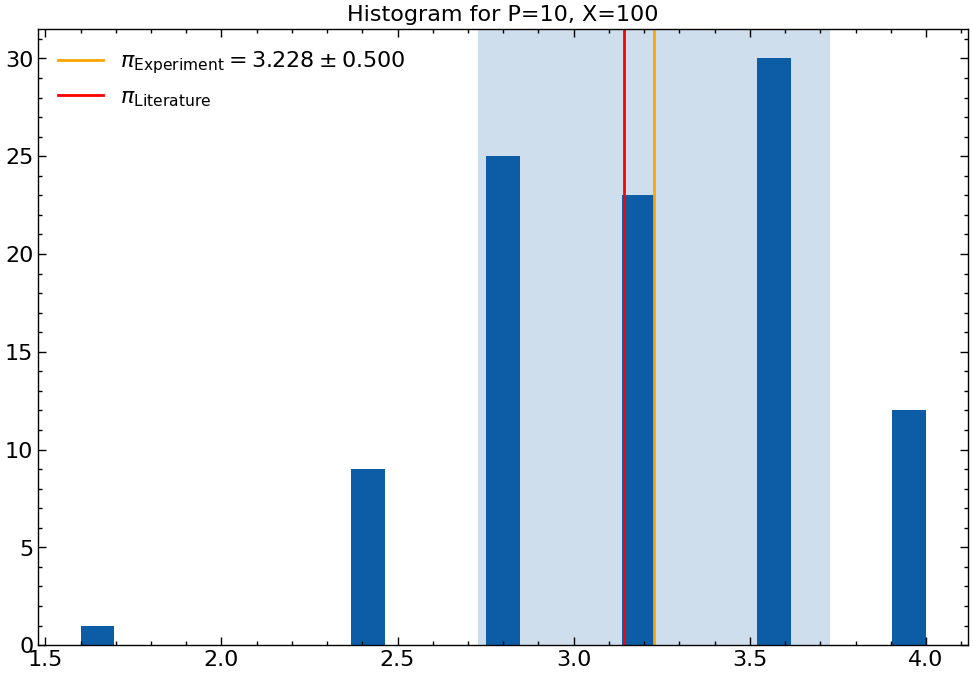

P=10, X=1000: Estimate PI Mean=3.1372. Standard Deviation=0.5197


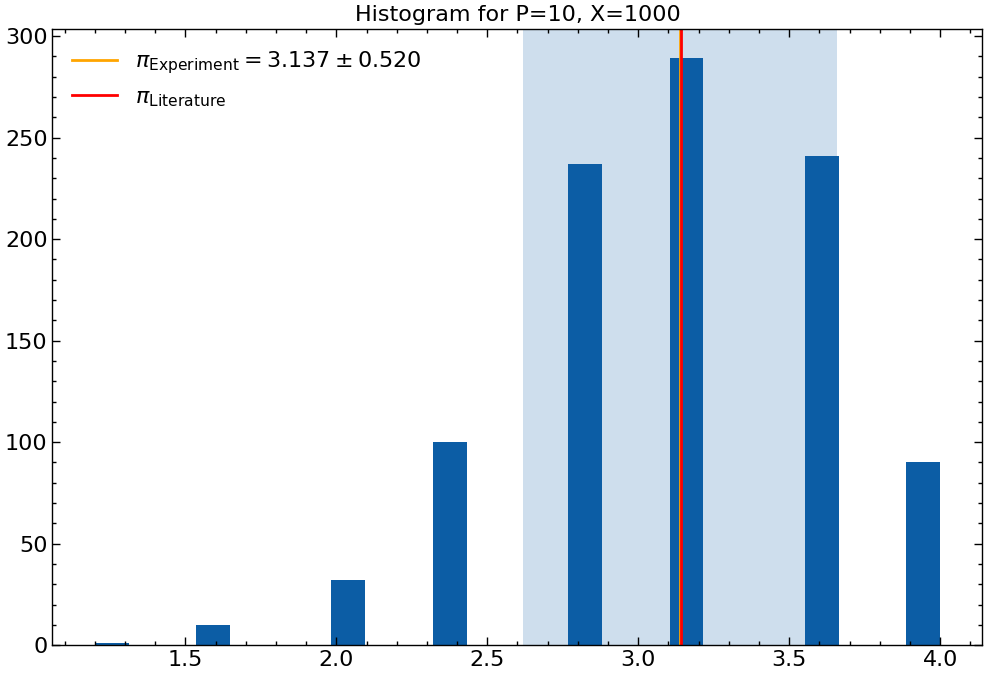

P=10, X=10000: Estimate PI Mean=3.1310. Standard Deviation=0.5216


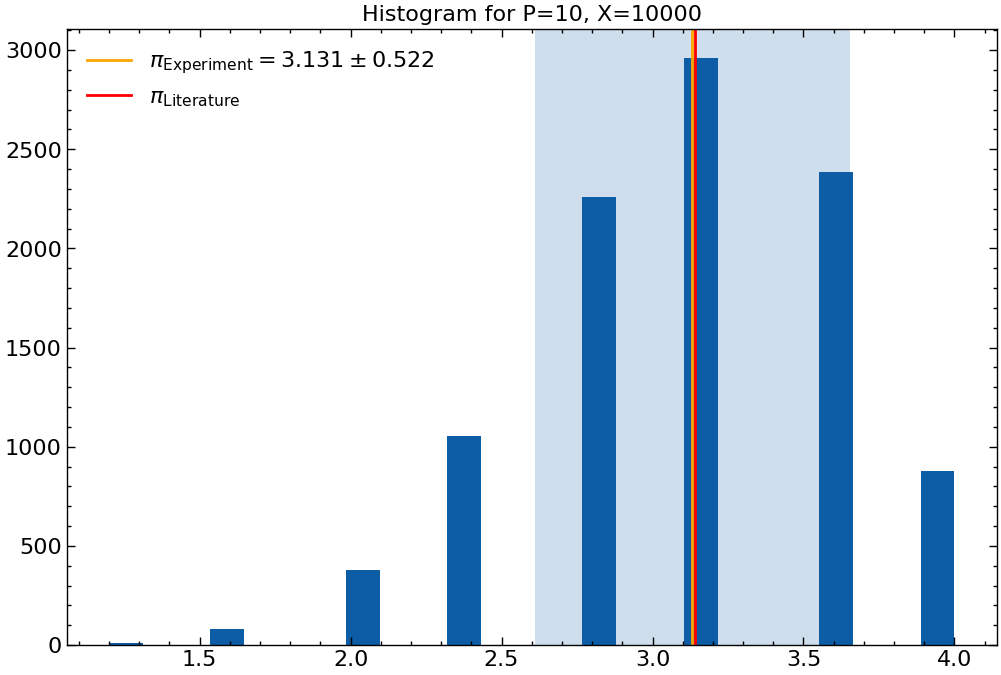

P=100, X=10: Estimate PI Mean=3.1480. Standard Deviation=0.2092


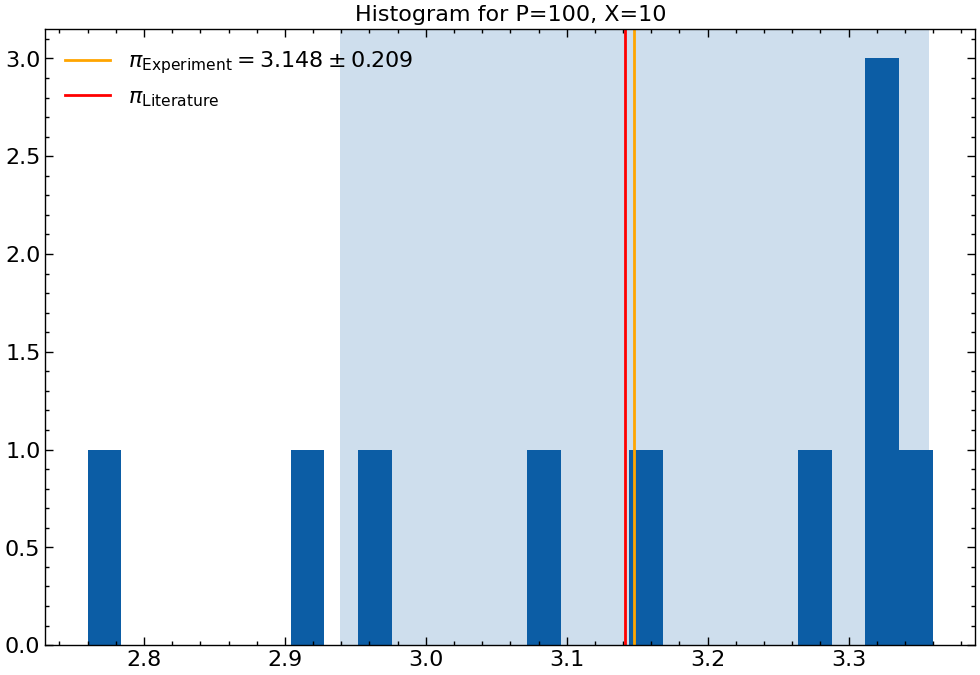

P=100, X=100: Estimate PI Mean=3.1384. Standard Deviation=0.1744


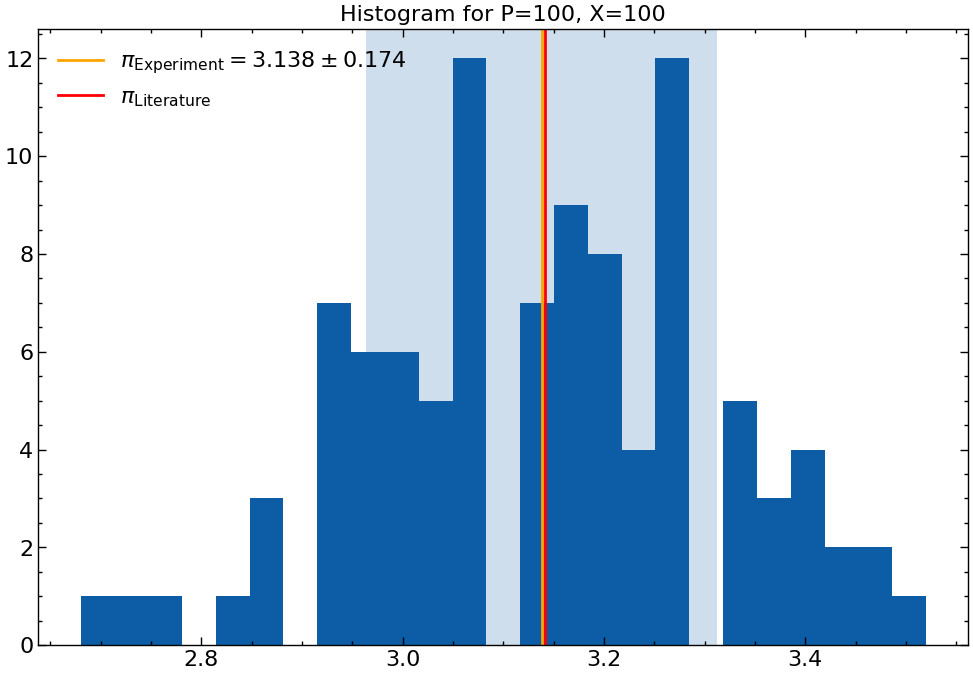

P=100, X=1000: Estimate PI Mean=3.1483. Standard Deviation=0.1662


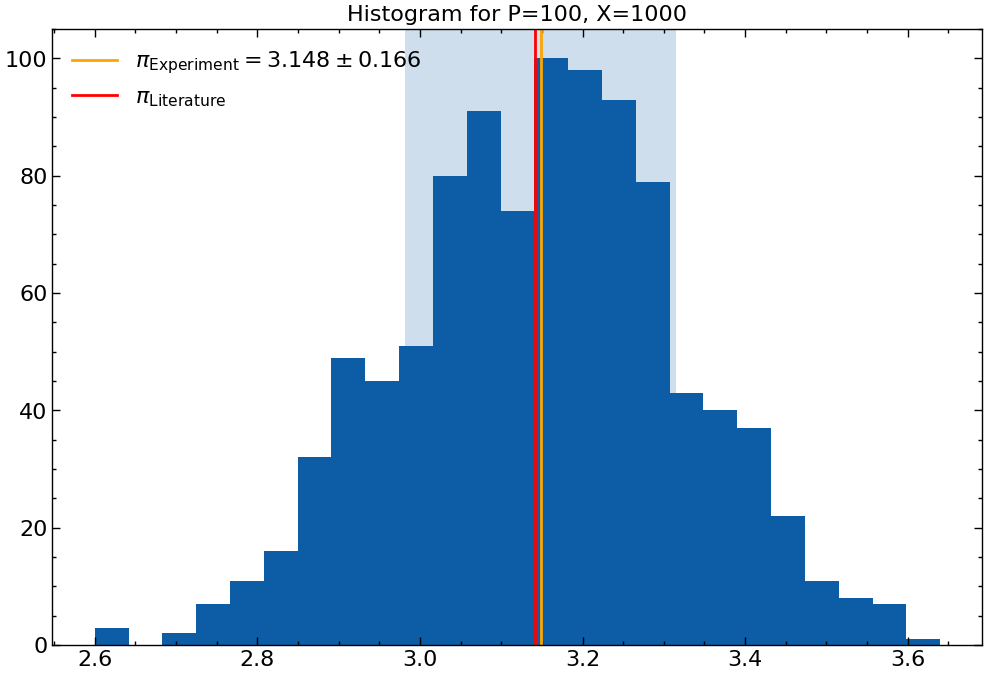

P=100, X=10000: Estimate PI Mean=3.1420. Standard Deviation=0.1628


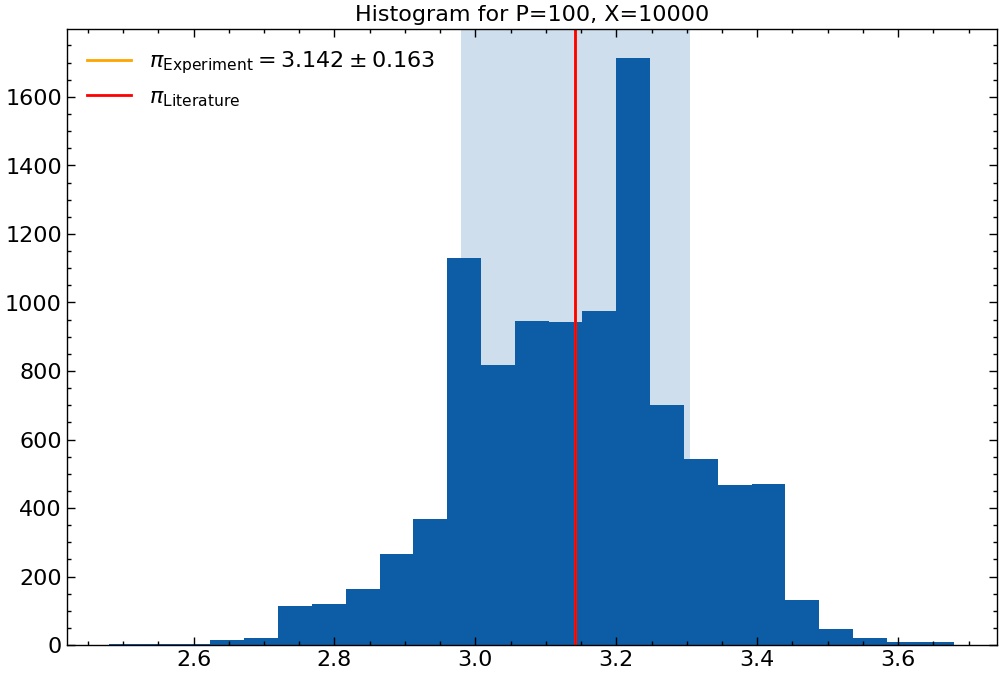

P=1000, X=10: Estimate PI Mean=3.1368. Standard Deviation=0.0390


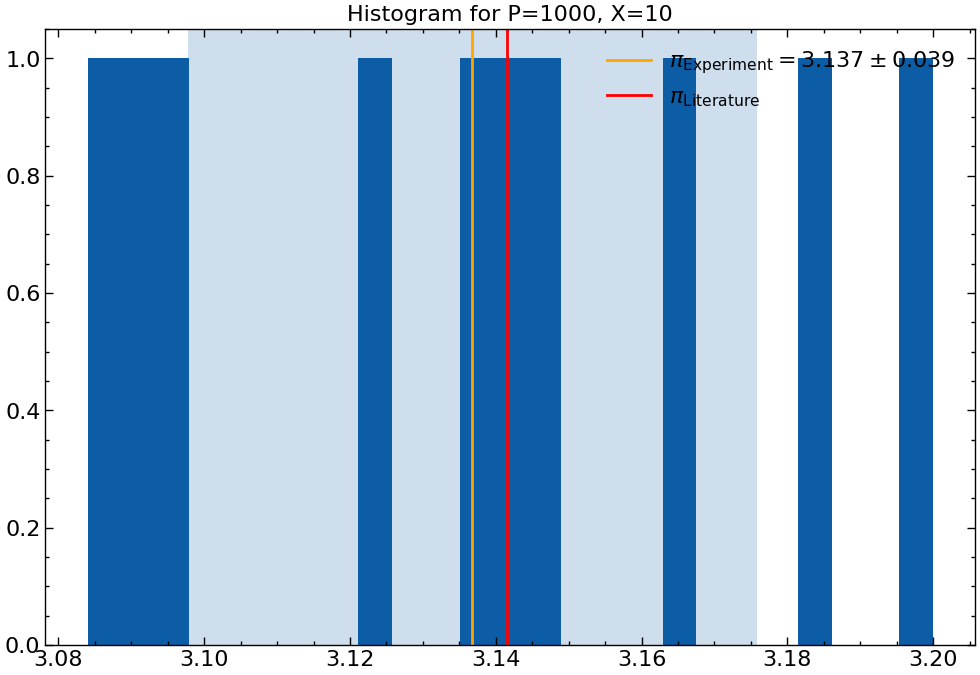

P=1000, X=100: Estimate PI Mean=3.1348. Standard Deviation=0.0494


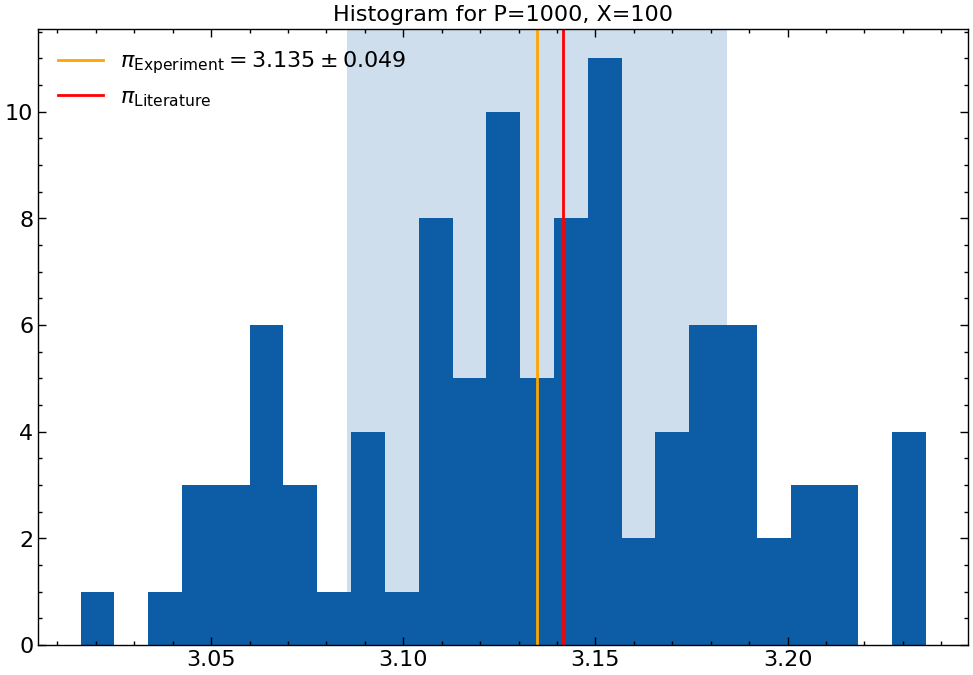

P=1000, X=1000: Estimate PI Mean=3.1389. Standard Deviation=0.0521


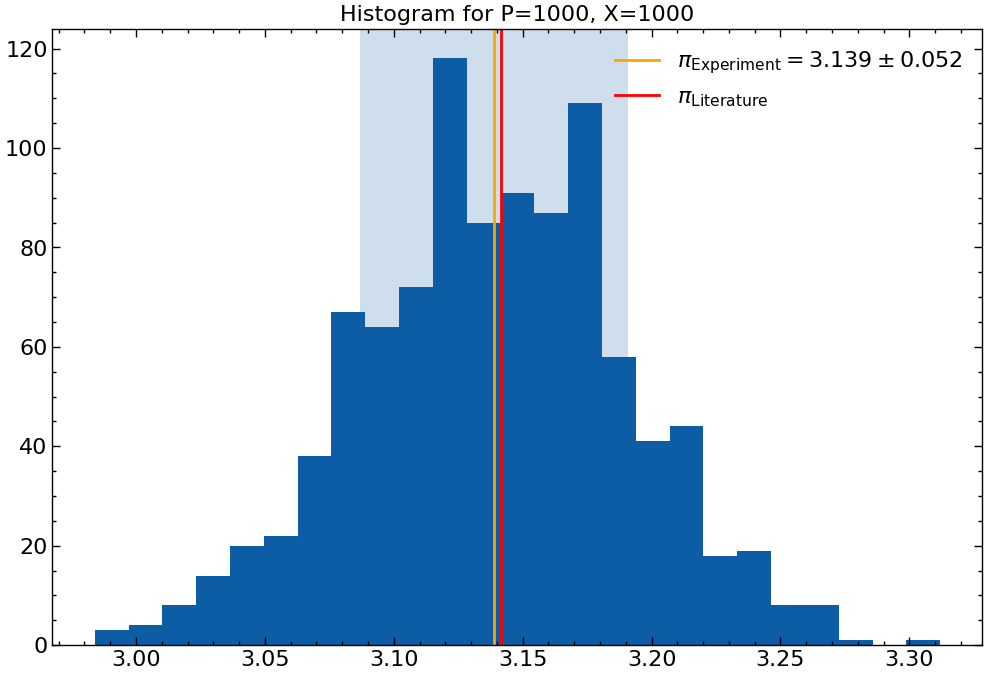

P=1000, X=10000: Estimate PI Mean=3.1411. Standard Deviation=0.0526


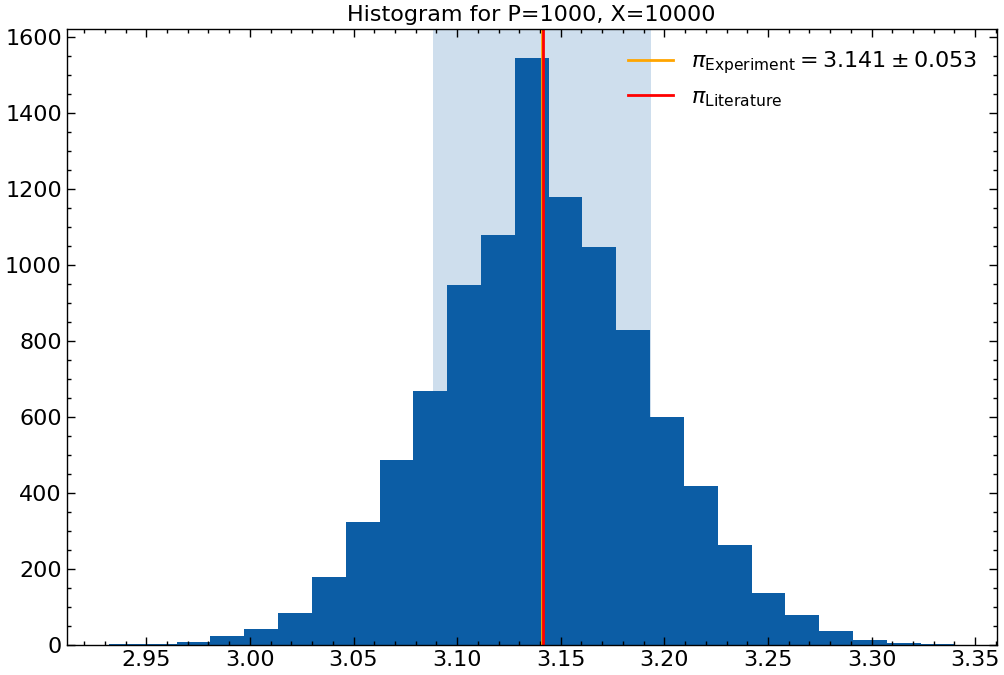

P=10000, X=10: Estimate PI Mean=3.1492. Standard Deviation=0.0111


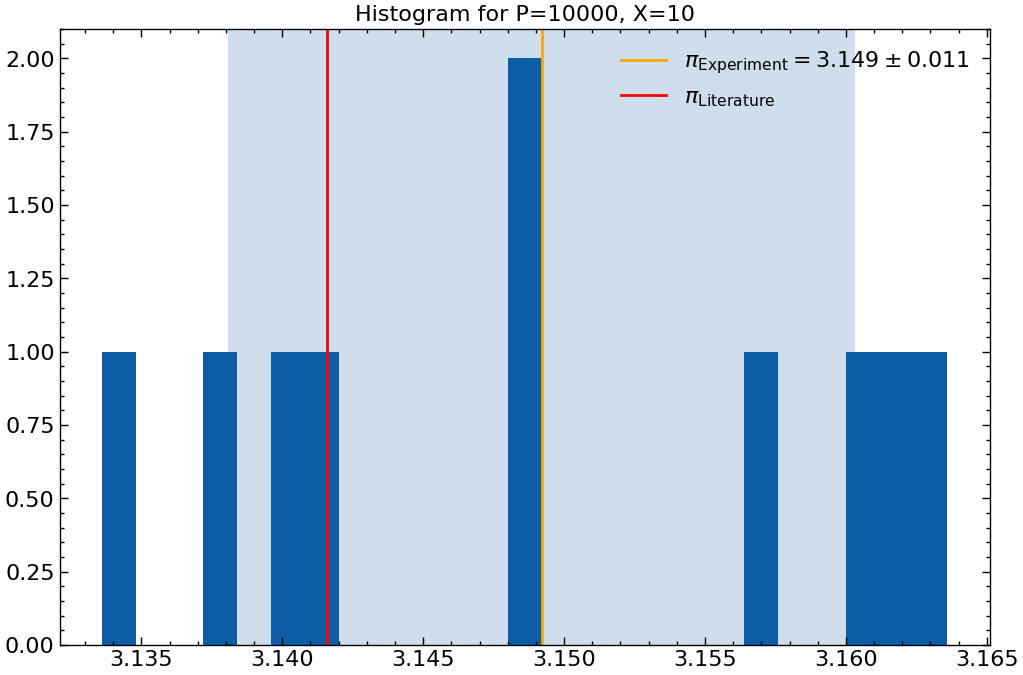

P=10000, X=100: Estimate PI Mean=3.1440. Standard Deviation=0.0174


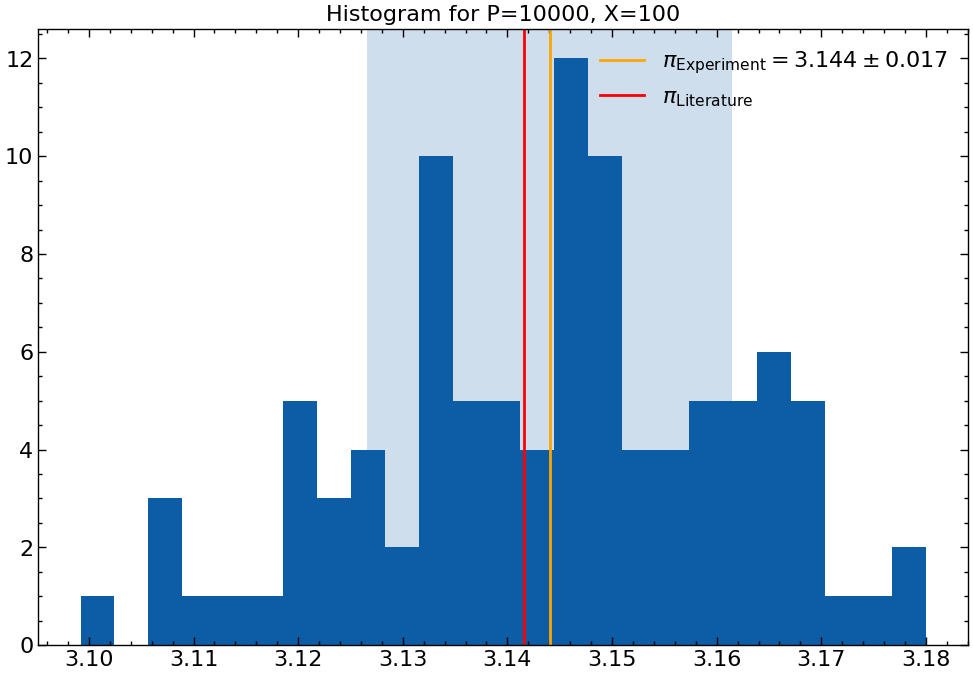

P=10000, X=1000: Estimate PI Mean=3.1406. Standard Deviation=0.0164


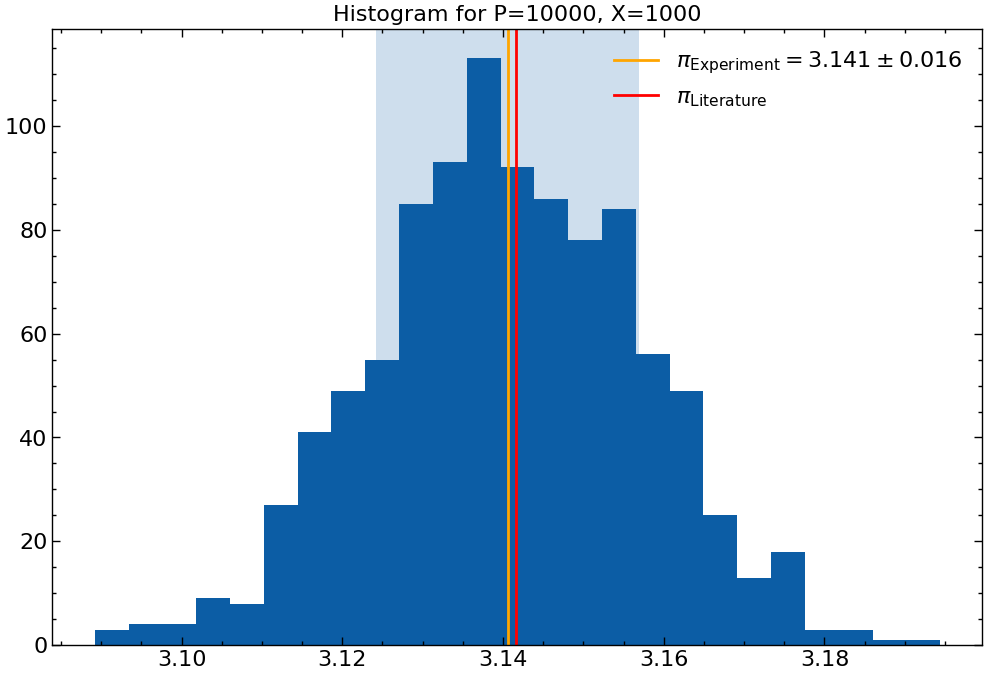

P=10000, X=10000: Estimate PI Mean=3.1413. Standard Deviation=0.0166


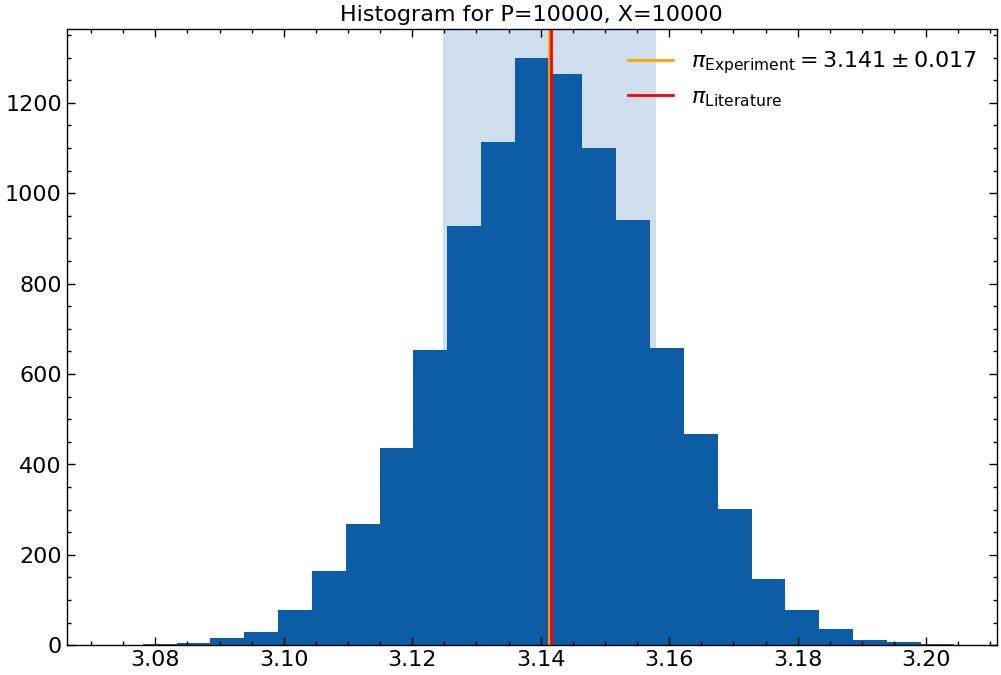

In [81]:
fixedp_uncertainty = dict()
fixedx_uncertainty = dict()

for num_samples in [10, 100, 1000, 10000]:
    for num_experiments in [10, 100, 1000, 10000]:
        pi_means, pi_stds, radius, inside = estimate_pi(num_samples, num_experiments)

        mean = pi_means.sum() / num_experiments
        std = np.sqrt(np.sum((pi_means - mean)**2) / (num_experiments-1))
        print(f'P={num_samples}, X={num_experiments}: Estimate PI Mean={mean:.4f}. Standard Deviation={std:.4f}')

        plt.hist(pi_means, bins=25)
        plt.axvline(x=mean, color='forestgreen', label=f'$\\pi_\\text{{Experiment}} = {mean:.3f} \\pm {std:.3f}$')
        plt.axvline(x=np.pi, color='red', label='$\\pi_\\text{Literature}$')
        plt.axvspan(xmin=mean - std, xmax=mean + std, alpha=0.2)

        plt.title(f'Histogram for P={num_samples}, X={num_experiments}')
        plt.legend()
        plt.show()

        if num_samples in fixedp_uncertainty:
            fixedp_uncertainty[num_samples].append((num_experiments, std))
        else:
            fixedp_uncertainty[num_samples] = [(num_experiments, std)]

        if num_experiments in fixedx_uncertainty:
            fixedx_uncertainty[num_experiments].append((num_samples, std))
        else:
            fixedx_uncertainty[num_experiments] = [(num_samples, std)]


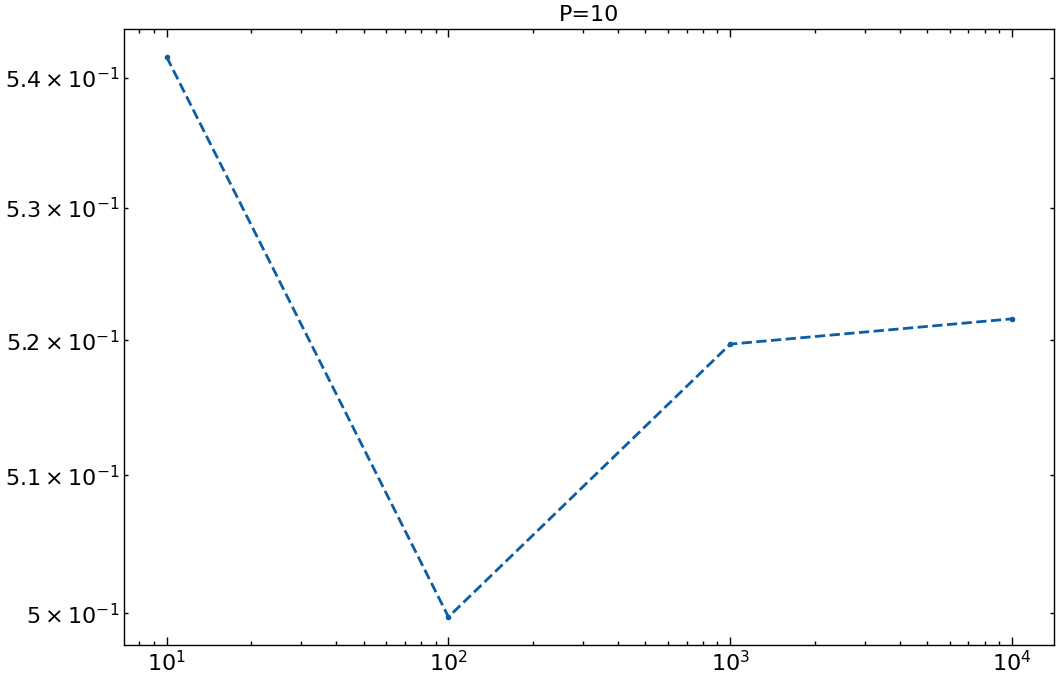

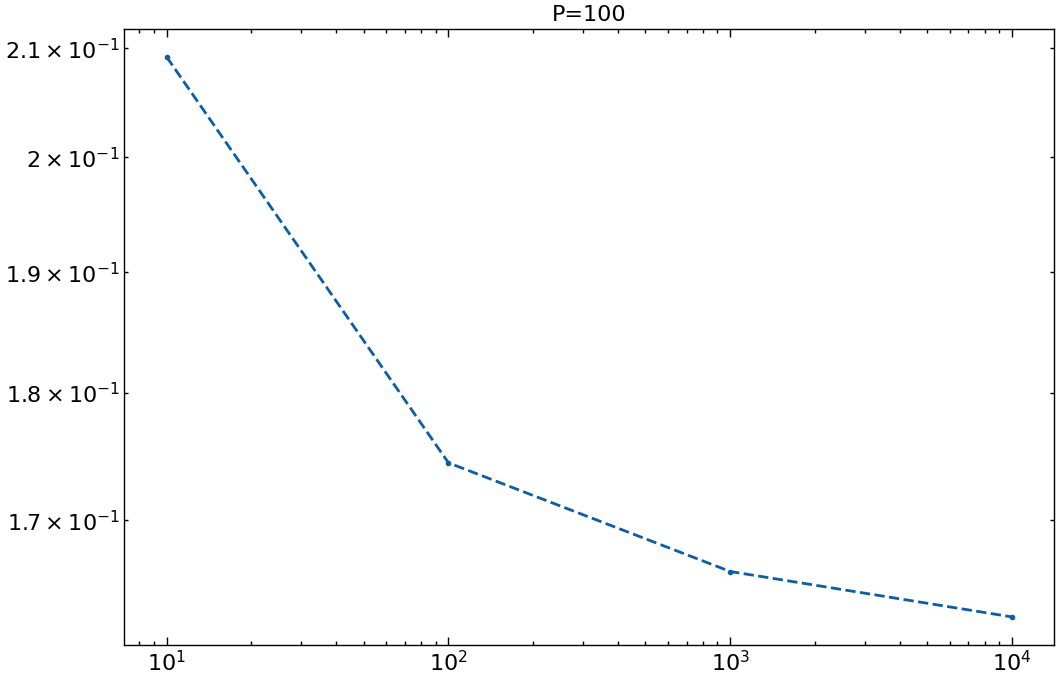

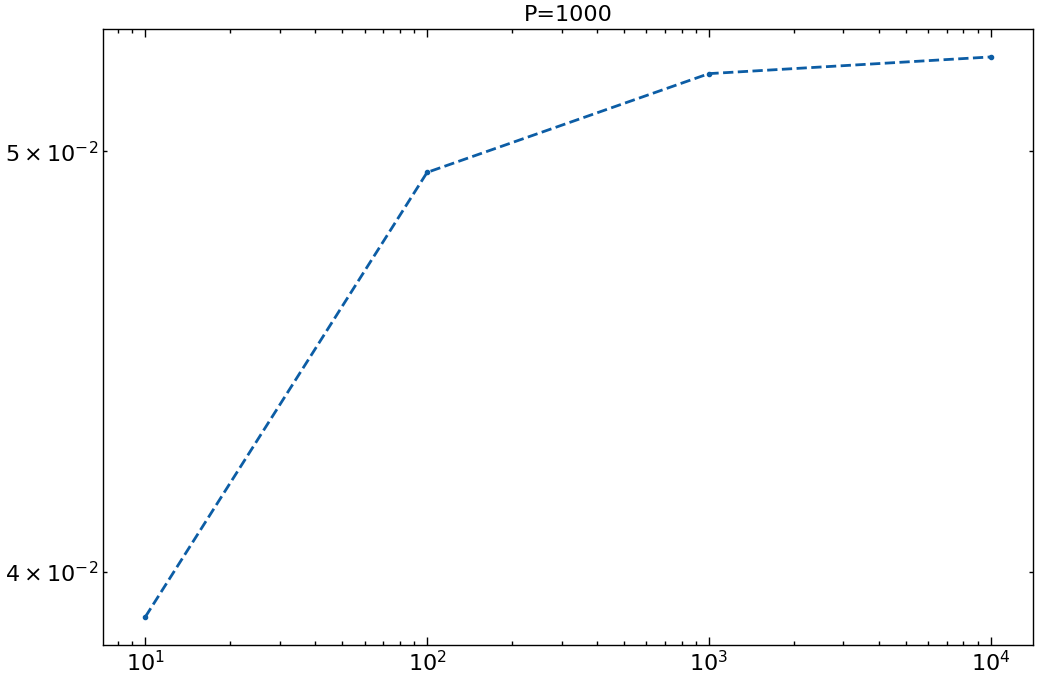

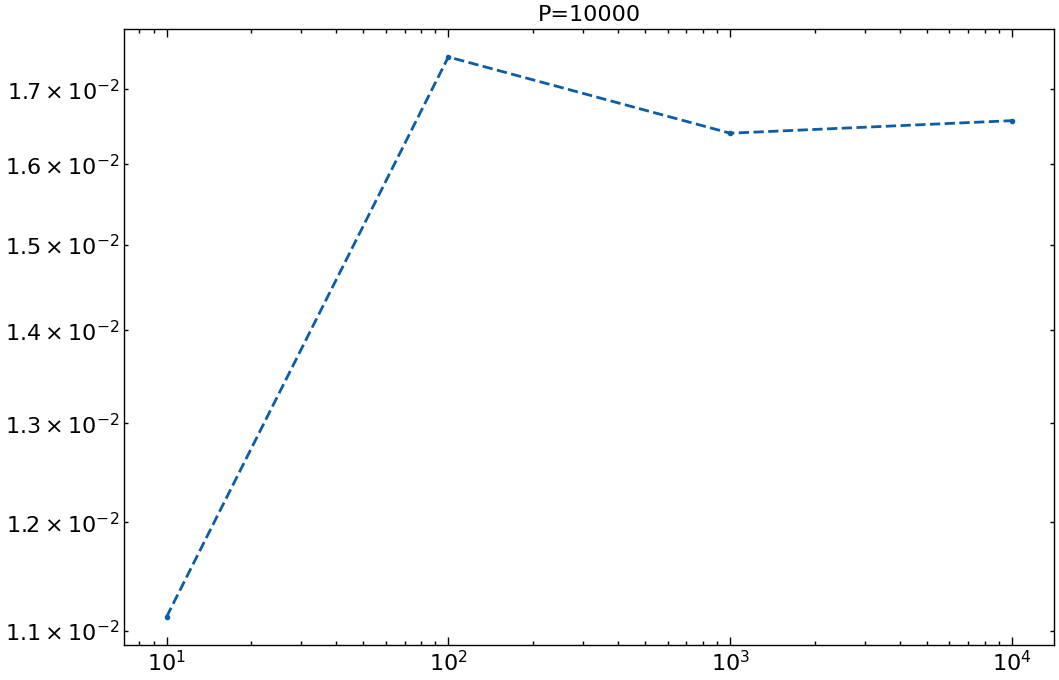

In [82]:
for p in fixedp_uncertainty:
    xarr = [item[0] for item in fixedp_uncertainty[p]]
    yarr = [item[1] for item in fixedp_uncertainty[p]]

    plt.loglog(xarr, yarr, 'o--')
    plt.title(f'P={p}')
    plt.show()

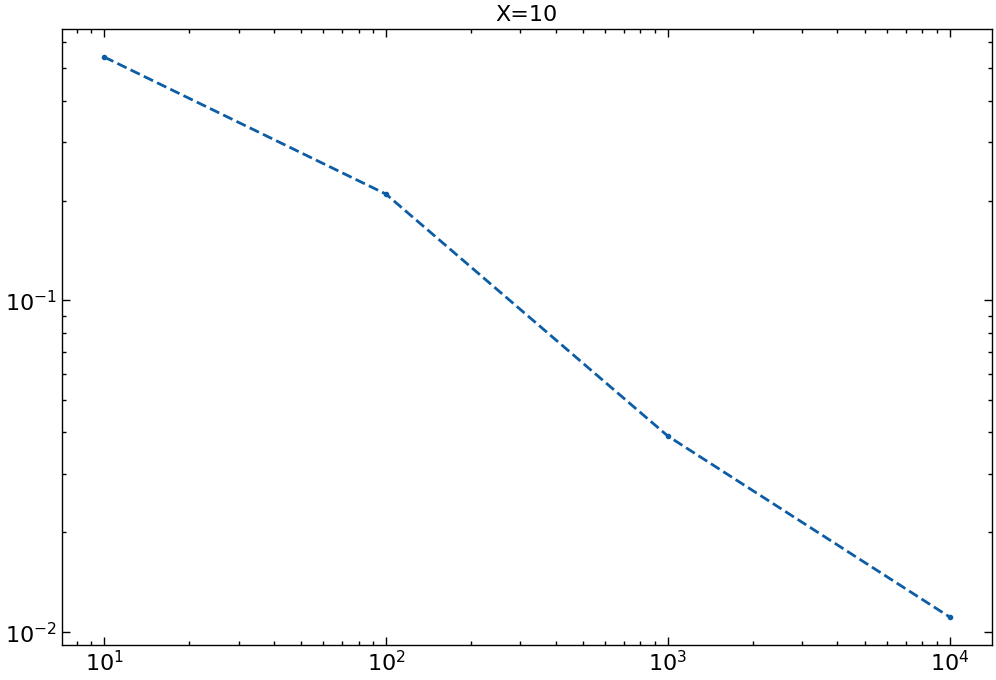

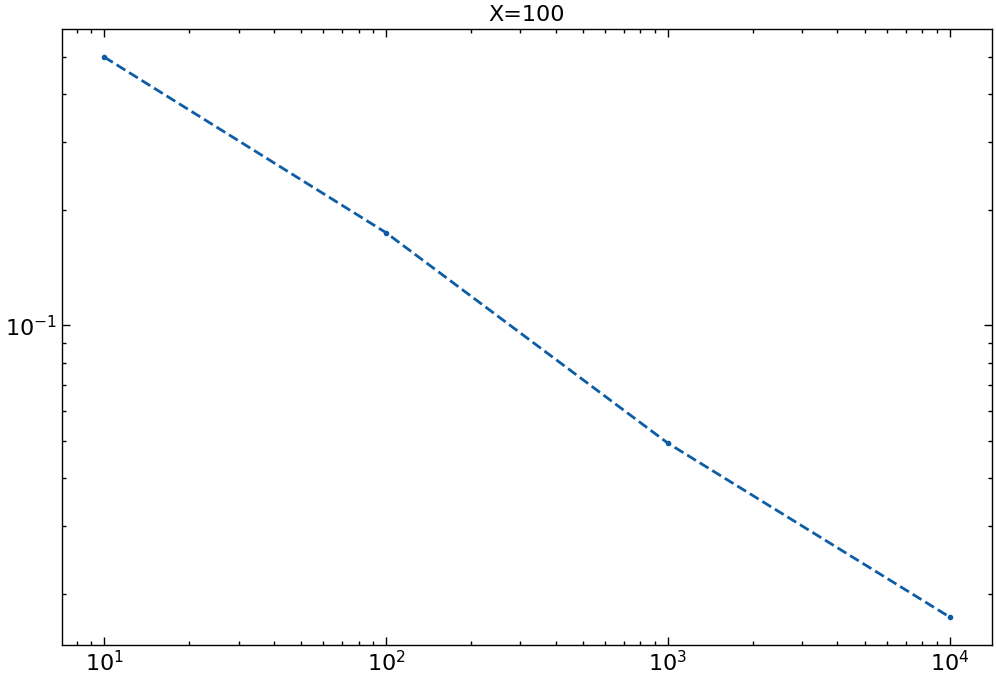

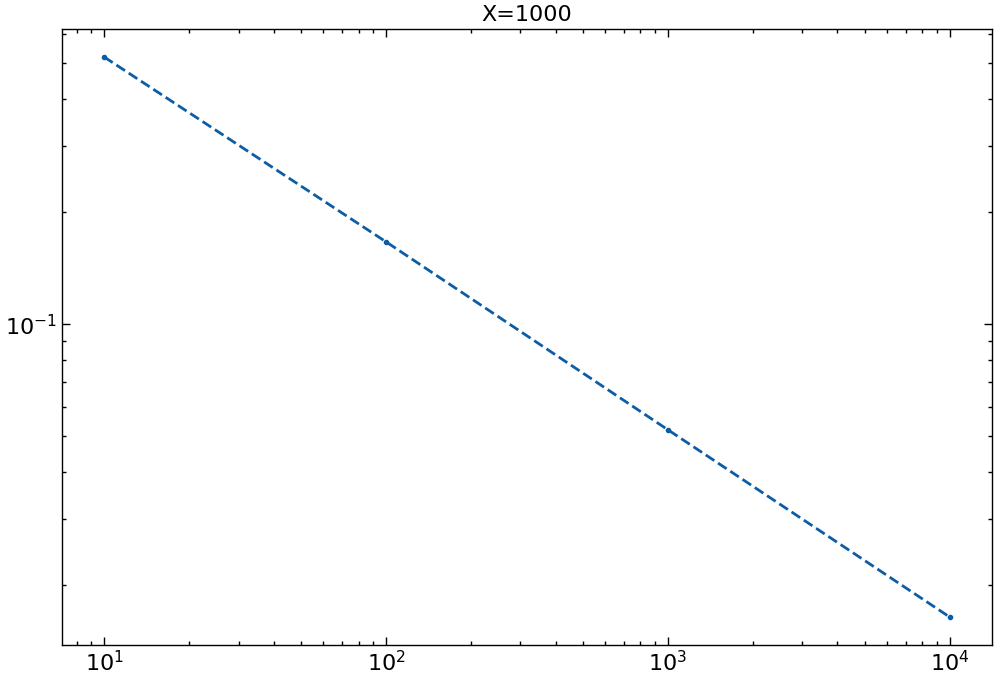

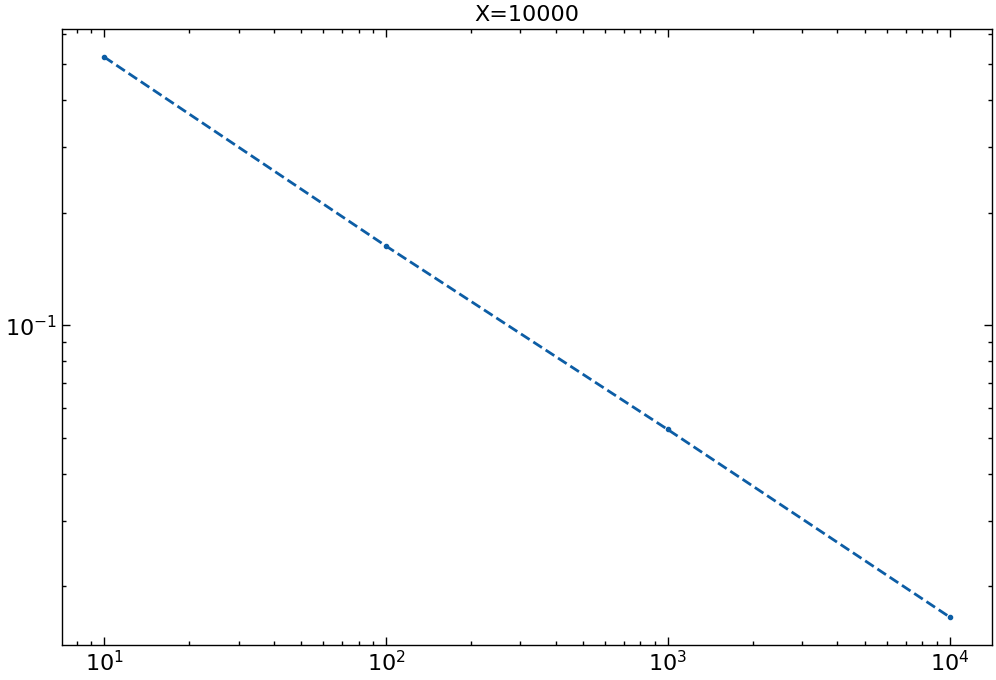

In [83]:
for num_experiments in fixedx_uncertainty:
    xarr = [item[0] for item in fixedx_uncertainty[num_experiments]]
    yarr = [item[1] for item in fixedx_uncertainty[num_experiments]]

    plt.loglog(xarr, yarr, 'o--')
    plt.title(f'X={num_experiments}')
    plt.show()